In [6]:
import numpy as np
import pandas as pd

import string
import importlib

import russia_df_utils
importlib.reload(russia_df_utils)
from russia_df_utils import get_uncategorized_df_rows

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models, similarities, matutils
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set()

%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [7]:
number_of_topics = 20

In [8]:
clustered_tweets = get_uncategorized_df_rows(drop_retweets=True)
clustering_text = clustered_tweets['processed_text']

In [9]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words.remove('all')
count_vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df=10)
count_vectorized_tweets = count_vectorizer.fit_transform(clustering_text.values)
corpus = matutils.Sparse2Corpus(count_vectorized_tweets.transpose())
id2word_lda = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())


In [10]:
lda = models.LdaMulticore(workers=3, corpus=corpus, num_topics=number_of_topics, id2word=id2word_lda, passes=100)

2018-03-07 03:54:16,631 : INFO : using symmetric alpha at 0.05
2018-03-07 03:54:16,632 : INFO : using symmetric eta at 0.05
2018-03-07 03:54:16,634 : INFO : using serial LDA version on this node
2018-03-07 03:54:18,120 : INFO : running online LDA training, 20 topics, 100 passes over the supplied corpus of 51867 documents, updating every 6000 documents, evaluating every ~51867 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-07 03:54:18,122 : INFO : training LDA model using 3 processes
2018-03-07 03:54:18,154 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/51867, outstanding queue size 1
2018-03-07 03:54:18,267 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/51867, outstanding queue size 2
2018-03-07 03:54:18,370 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/51867, outstanding queue size 3
2018-03-07 03:54:18,567 : INFO : PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/51867, ou

In [11]:
top_topics = lda.top_topics(corpus)

2018-03-07 05:02:29,738 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-03-07 05:02:29,746 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-03-07 05:02:29,755 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-03-07 05:02:29,763 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2018-03-07 05:02:29,771 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2018-03-07 05:02:29,779 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2018-03-07 05:02:29,787 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2018-03-07 05:02:29,795 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2018-03-07 05:02:29,803 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2018-03-07 05:02:29,811 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2018-03-07 05:02:29,819 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2018-03-07 05:02:29

In [12]:
top_topics

[([(0.043798678, 'people'),
   (0.043789938, 'like'),
   (0.0357693, 'love'),
   (0.028733768, 'not'),
   (0.024781609, 'know'),
   (0.023176314, 'think'),
   (0.019538676, 'want'),
   (0.017310161, 'all'),
   (0.01657785, 'nothing'),
   (0.014703875, 'good'),
   (0.014599708, 'look'),
   (0.013309426, 'something'),
   (0.013208954, 'say'),
   (0.012037461, 'even'),
   (0.011115886, 'things'),
   (0.010525743, 'everything'),
   (0.010186837, 'someone'),
   (0.009559523, 'feel'),
   (0.009490325, 'true'),
   (0.008910326, 'well')],
  -4.455007857122982),
 ([(0.05858249, 'get'),
   (0.025483036, 'got'),
   (0.021037623, 'god'),
   (0.019018935, 'life'),
   (0.018300323, 'really'),
   (0.015177612, 'not'),
   (0.012633359, 'oh'),
   (0.011976751, 'live'),
   (0.011812652, 'always'),
   (0.009575409, 'one'),
   (0.009430744, 'others'),
   (0.009368113, 'time'),
   (0.009200172, 'could'),
   (0.009174887, 'next'),
   (0.009144195, 'good'),
   (0.009059697, 'wish'),
   (0.009019972, 'america

In [8]:
#labels = [x[1] for x in top_topics[0][0]]
#values = [x[0] for x in top_topics[0][0]]
#top_topics[0][0]
#plt.barh(labels, values)


In [13]:
lda_corpus = lda[corpus]
lda_docs = [doc for doc in lda_corpus]
lda_docs[0:5]

[[(1, 0.27600798),
  (7, 0.13659534),
  (12, 0.1351813),
  (15, 0.105000004),
  (16, 0.27221537)],
 [(7, 0.675), (10, 0.175)],
 [(0, 0.05),
  (1, 0.05),
  (2, 0.05),
  (3, 0.05),
  (4, 0.05),
  (5, 0.05),
  (6, 0.05),
  (7, 0.05),
  (8, 0.05),
  (9, 0.05),
  (10, 0.05),
  (11, 0.05),
  (12, 0.05),
  (13, 0.05),
  (14, 0.05),
  (15, 0.05),
  (16, 0.05),
  (17, 0.05),
  (18, 0.05),
  (19, 0.05)],
 [(1, 0.175), (5, 0.34166667), (9, 0.175), (11, 0.175)],
 [(5, 0.11666666), (16, 0.28896758), (19, 0.49992132)]]

In [14]:
lda_docs_to_train = np.zeros((len(lda_docs), number_of_topics))

In [15]:
for idx, doc in enumerate(lda_docs):
    for topic, prob in doc:
        lda_docs_to_train[idx][topic] = prob
        

In [16]:
lda_docs_to_train

array([[0.        , 0.27600798, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       ...,
       [0.        , 0.60543406, 0.13124999, ..., 0.        , 0.        ,
        0.        ],
       [0.01666667, 0.01666667, 0.01666667, ..., 0.01666667, 0.01666667,
        0.01666667],
       [0.        , 0.        , 0.67500001, ..., 0.        , 0.        ,
        0.        ]])

In [17]:
SSEs = []
k_range = range(3,30)
for k in k_range:
    print('KM with {} clusters.'.format(k))
    model = KMeans(n_clusters=k)
    model.fit(lda_docs_to_train)
    labels = model.labels_
    clustered_tweets['cluster_k{}'.format(k)] = labels
    clustered_tweets.to_csv('../csvs/km_lda_20_50passes.csv')
    #Sil_coefs.append(silhouette_score(vectorized_tweets, labels, metric='euclidean'))
    SSEs.append(model.inertia_) 

KM with 3 clusters.
KM with 4 clusters.
KM with 5 clusters.
KM with 6 clusters.
KM with 7 clusters.
KM with 8 clusters.
KM with 9 clusters.
KM with 10 clusters.
KM with 11 clusters.
KM with 12 clusters.
KM with 13 clusters.
KM with 14 clusters.
KM with 15 clusters.
KM with 16 clusters.
KM with 17 clusters.
KM with 18 clusters.
KM with 19 clusters.
KM with 20 clusters.
KM with 21 clusters.
KM with 22 clusters.
KM with 23 clusters.
KM with 24 clusters.
KM with 25 clusters.
KM with 26 clusters.
KM with 27 clusters.
KM with 28 clusters.
KM with 29 clusters.


In [18]:
Sil_coefs = []
#clustered_tweets = pd.read_csv('../csvs/km_lda.csv')
#k_range = range(3,40)
for k in k_range:
    print(k)
    Sil_coefs.append(silhouette_score(count_vectorized_tweets, 
                                      clustered_tweets['cluster_k{}'.format(k)],
                                      metric='cosine',
                                     sample_size=10000))

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


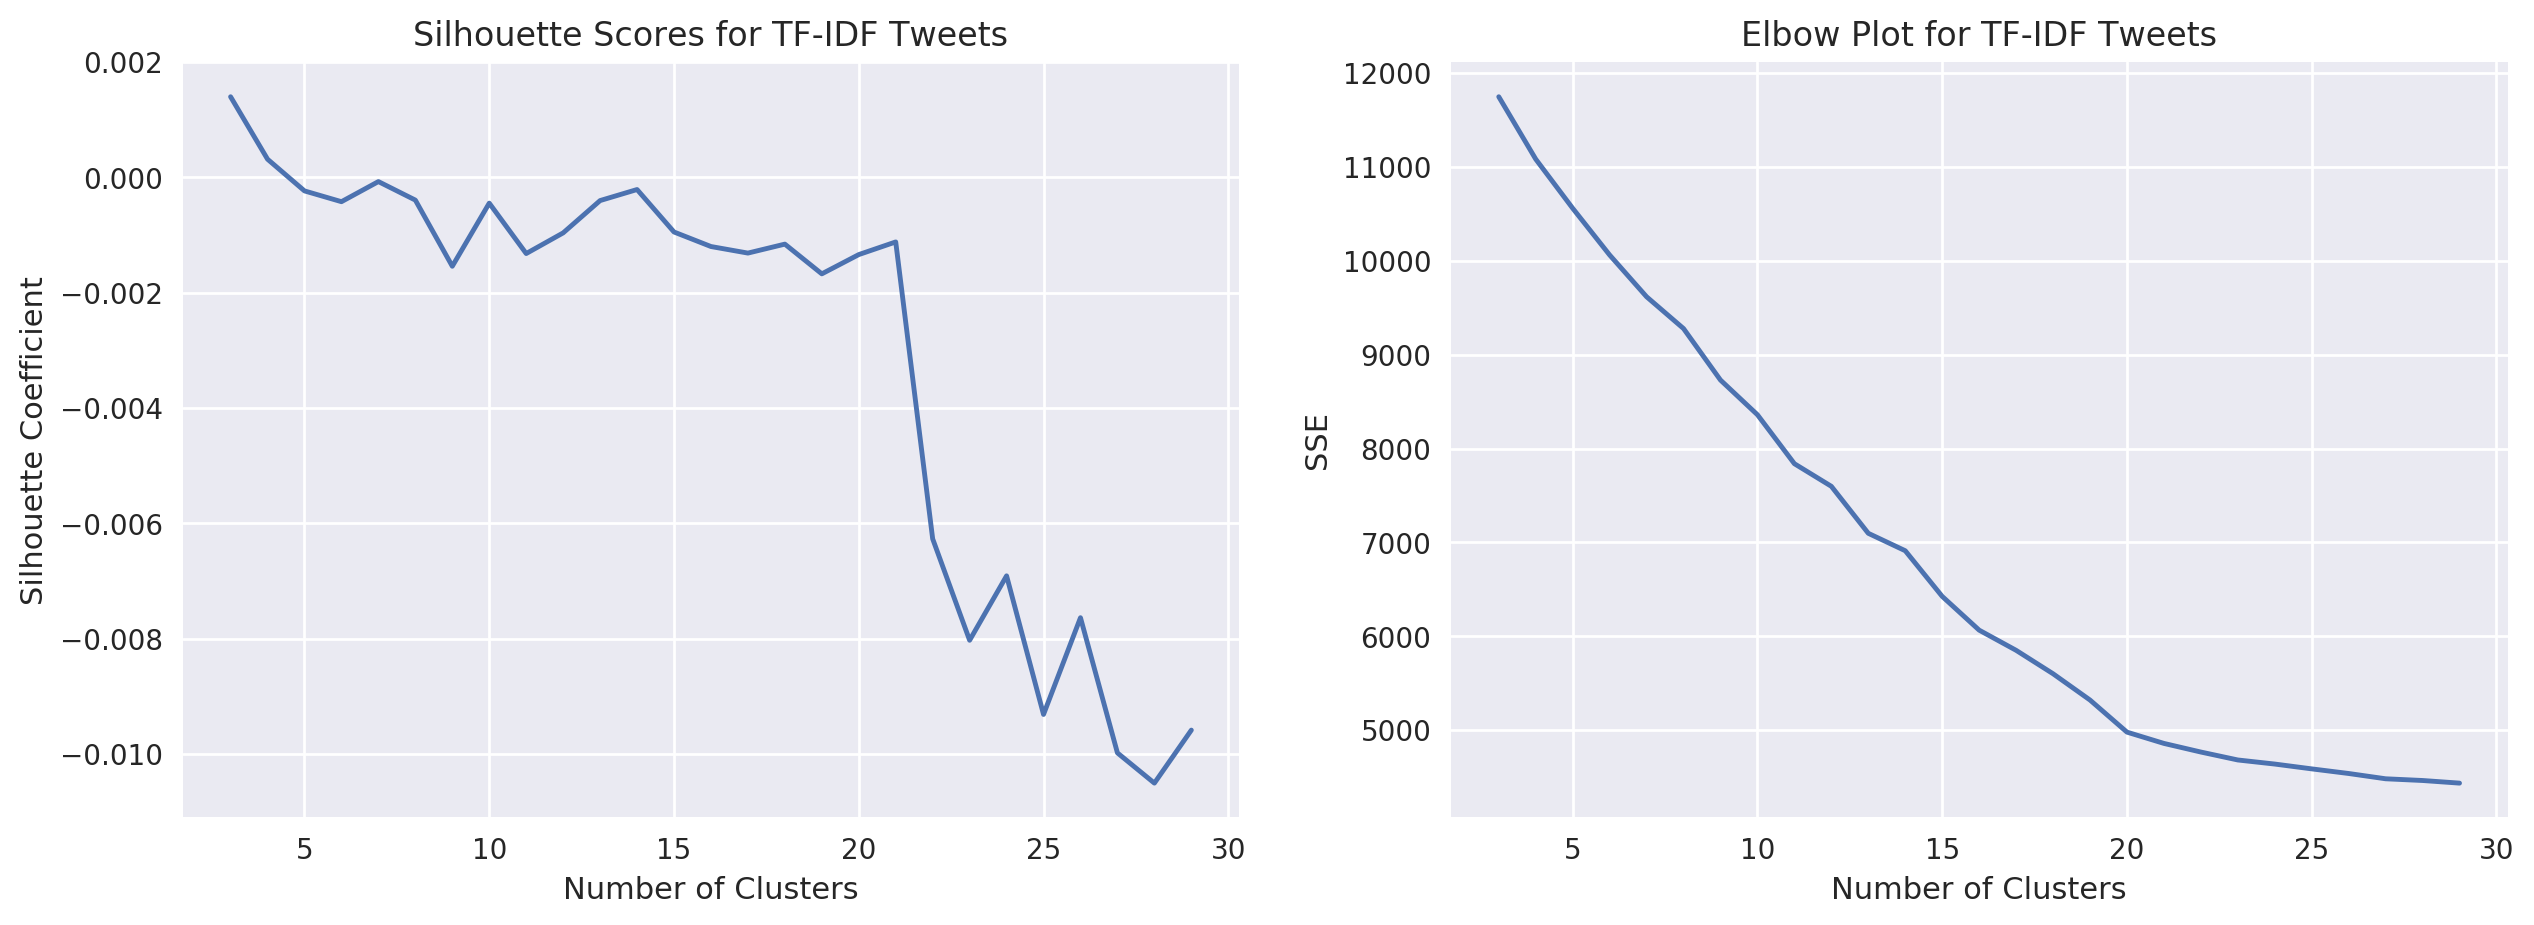

In [19]:
k_clusters = list(k_range)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_title('Silhouette Scores for TF-IDF Tweets')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_title('Elbow Plot for TF-IDF Tweets')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('SSE');

In [39]:
clustered_tweets['cluster_k16'].value_counts()

5     8223
10    3667
12    3569
4     3474
13    3355
0     3145
9     3143
7     3104
1     3059
14    2939
6     2660
3     2554
8     2474
15    2353
11    2225
2     1923
Name: cluster_k16, dtype: int64

In [62]:
clustered_tweets[clustered_tweets['cluster_k20'] == 2].sample(5)['text'].values

array(["Hillary Clinton's pneumonia diagnosis fuels health questions  #politics",
       'WikiLeaks’ Assange promises leaks on US election, Google https://t.co/4j5xOnP6jp #news',
       'Watch da video all the way thru. pay attention around :55 an tell me wtf U heard her say to these kids.… https://t.co/DMp3igqI3w',
       "Day 4 at the DNC: Hillary's big night  #politics",
       "@charliecalley63 You mean like he couldn't win the election? Oh, wait..."],
      dtype=object)